In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
category_mapping = {
    'Singapore': 1,
    'Sports': 2,
    'Lifestyle': 3,
    'World': 4,
    'Business': 5,
    'Technology': 6
}

In [36]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    all_articles = pickle.load(data)
    
#TD-IDF Features    
#Training Features
training_features_path = "./Pickles/tdidf_training_features.pickle"
with open(training_features_path, 'rb') as data:
    tdidf_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/tdidf_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    tdidf_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/tdidf_test_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/tdidf_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_test_labels = pickle.load(data)

In [37]:
mnb = MultinomialNB()
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Using TF-IDF Features

In [38]:
mnb.fit(tdidf_training_features, tdidf_training_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
mnb_pred = mnb.predict(tdidf_test_features)

In [40]:
# Training Accuracy
print("The Training Accuracy is: ",accuracy_score(tdidf_training_labels, mnb.predict(tdidf_training_features)))

# Testing Accuracy
print("The Testing Accuracy is: ",accuracy_score(tdidf_test_labels, mnb.predict(tdidf_test_features)))

The Training Accuracy is:  0.7883680555555556
The Testing Accuracy is:  0.7527777777777778


In [41]:
%%time
from sklearn.metrics import classification_report
mnb_pred = mnb.predict(tdidf_test_features)

print('accuracy %s' % accuracy_score(mnb_pred, tdidf_test_labels))
print(classification_report(tdidf_test_labels, mnb_pred,target_names=category_mapping))

accuracy 0.7527777777777778
              precision    recall  f1-score   support

   Singapore       0.75      0.75      0.75       130
      Sports       0.95      0.95      0.95       130
   Lifestyle       0.76      0.86      0.80       113
       World       0.79      0.66      0.72       113
    Business       0.59      0.68      0.63       110
  Technology       0.67      0.60      0.63       124

    accuracy                           0.75       720
   macro avg       0.75      0.75      0.75       720
weighted avg       0.76      0.75      0.75       720

Wall time: 14.7 ms


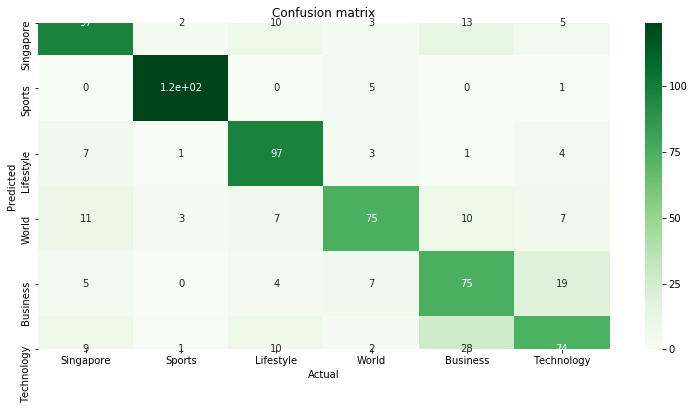

In [42]:
aux_df = all_articles[['category', 'category_code']].drop_duplicates().sort_values('category_code')
conf_matrix = confusion_matrix(tdidf_test_labels, mnb_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=category_mapping, 
            yticklabels=category_mapping,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [43]:
d = {
     'Model': 'Multinomial Naïve Bayes',
    'Features': 'TF-IDF',
     'Training Set Accuracy': accuracy_score(tdidf_training_labels, mnb.predict(tdidf_training_features)),
     'Test Set Accuracy': accuracy_score(tdidf_test_labels, mnb.predict(tdidf_test_features))
}

df_models_mnb = pd.DataFrame(d, index=[0])

In [44]:
df_models_mnb

,Model,Features,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,TF-IDF,0.788368,0.752778
